In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [331]:
col_names = ['mpg',
             'cylinders',
             'displacement',
             'horsepower',
             'weight',
             'acceleration',
             'model_year',
             'origin',
             'car  name']

In [332]:
mpgDF = pd.read_csv('../data/auto-mpg.csv', delimiter='\s+', names=col_names)
mpgDF

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [333]:
mpgDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car  name     398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [334]:
mpgDF['origin'] = mpgDF['origin'].astype('category')

In [335]:
# 결측치 확인
mpgDF[mpgDF['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [336]:
# 결측치가 포함된 차종 확인
for car in mpgDF[mpgDF['horsepower'] == '?']['car  name']:
    print(mpgDF[mpgDF['car  name'] == car])
    print()

      mpg  cylinders  displacement horsepower  weight  acceleration  \
32   25.0          4          98.0          ?  2046.0          19.0   
112  19.0          4         122.0      85.00  2310.0          18.5   
130  26.0          4         122.0      80.00  2451.0          16.5   
168  23.0          4         140.0      83.00  2639.0          17.0   
174  18.0          6         171.0      97.00  2984.0          14.5   
206  26.5          4         140.0      72.00  2565.0          13.6   

     model_year origin   car  name  
32           71      1  ford pinto  
112          73      1  ford pinto  
130          74      1  ford pinto  
168          75      1  ford pinto  
174          75      1  ford pinto  
206          76      1  ford pinto  

      mpg  cylinders  displacement horsepower  weight  acceleration  \
17   21.0          6         200.0      85.00  2587.0          16.0   
100  18.0          6         250.0      88.00  3021.0          16.5   
126  21.0          6         

In [337]:
# 결측치가 많이 없으니 제외시킴
mpgDF = mpgDF[mpgDF['horsepower'] != '?'][col_names[:-2]]
mpgDF['horsepower'] = mpgDF['horsepower'].astype('float64')

In [338]:
# 상관관계
mpgDF.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


In [339]:
# 통계량 정보
mpgDF.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [340]:
# 목표값과 상관계수가 가장 높은 특성 3개 추출
# cylinders의 경우 다른 특성들과 상관관계가 높으나, int 자료형이라 연속적이지 않아 제외함
HighRDF = mpgDF[['mpg', 'displacement', 'horsepower', 'weight']]

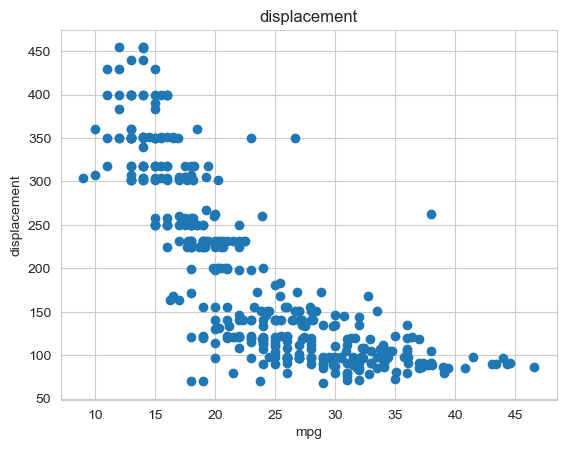

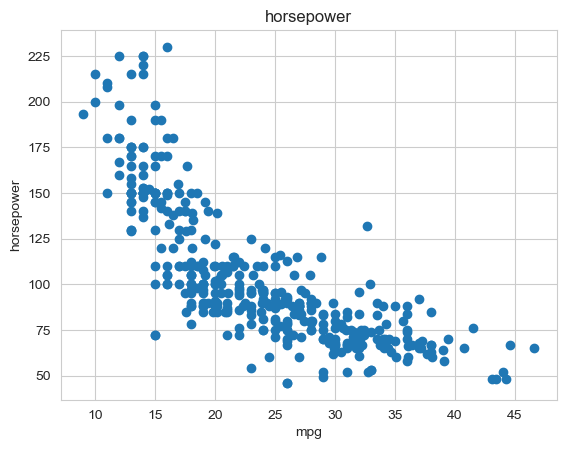

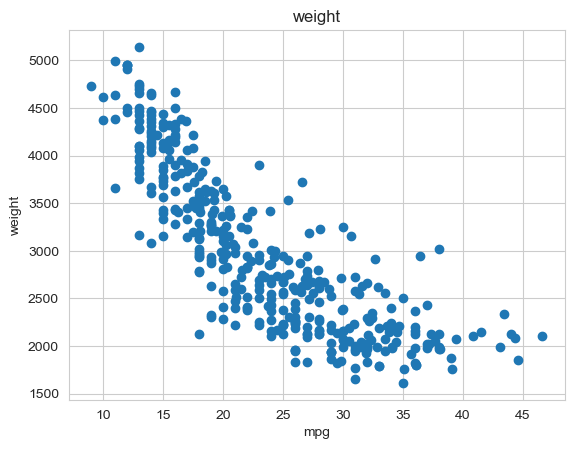

In [341]:
# 산점도를 그려보면 대체로 음의 상관관계를 가지나, 그 관계가 Linear하지 않다.
# 2차함수의 형태와 비슷해보인다.
for col in HighRDF.columns[1:]:
    plt.scatter(HighRDF['mpg'], HighRDF[col])
    plt.title(col)
    plt.xlabel('mpg')
    plt.ylabel(col)
    plt.show()

In [342]:
# 일단 기존의 feature만으로 모델을 만들어보자
X_train, X_test, y_train, y_test = train_test_split(HighRDF[HighRDF.columns[1:]],
                                                    HighRDF['mpg'],
                                                    random_state=7)

In [343]:
# 데이터마다 단위 차이가 크므로 스케일링
std_scaler = StandardScaler()
std_scaler.fit(X_train)
std_X_train = std_scaler.transform(X_train)
std_X_test = std_scaler.transform(X_test)

In [344]:
# 선형회귀모델
Linear_1Dmodel = LinearRegression()
Linear_1Dmodel.fit(std_X_train, y_train)

LinearRegression()

In [345]:
# 나쁘진 않은 점수. 그러나 더 개선할 수 있을 것 같다.
Linear_1Dmodel.score(std_X_train, y_train), Linear_1Dmodel.score(std_X_test, y_test)

(0.6941371087585931, 0.7421058178268423)

In [346]:
# 2차원 데이터를 만들어보자
poly2D = PolynomialFeatures(include_bias=False)
poly2D.fit(HighRDF)
feature2DF = pd.DataFrame(poly2D.transform(HighRDF))
feature2DF.columns = poly2D.get_feature_names_out()

In [347]:
# 기존의 데이터와 비교해 상관계수가 좋아지지 않았다.
feature2DF.corr()

,mpg,displacement,horsepower,weight,mpg^2,mpg displacement,mpg horsepower,mpg weight,displacement^2,displacement horsepower,displacement weight,horsepower^2,horsepower weight,weight^2
mpg,1.000000,-0.805127,-0.778427,-0.832244,0.985195,-0.369665,0.288968,0.593988,-0.752354,-0.748342,-0.792785,-0.712297,-0.787630,-0.806682
displacement,-0.805127,1.000000,0.897257,0.932994,-0.731850,0.787959,0.082501,-0.192701,0.981875,0.955263,0.984147,0.868595,0.931667,0.928779
horsepower,-0.778427,0.897257,1.000000,0.864538,-0.709523,0.601108,0.289238,-0.269182,0.910831,0.961672,0.908013,0.982807,0.974224,0.869720
weight,-0.832244,0.932994,0.864538,1.000000,-0.764271,0.672780,0.014798,-0.119816,0.895605,0.880002,0.956507,0.815723,0.932810,0.992019
mpg^2,0.985195,-0.731850,-0.709523,-0.764271,1.000000,-0.317663,0.308940,0.609178,-0.671483,-0.666591,-0.711903,-0.634686,-0.707395,-0.730370
mpg displacement,-0.369665,0.787959,0.601108,0.672780,-0.317663,1.000000,0.400107,0.339369,0.751798,0.692074,0.731694,0.571792,0.626581,0.648695
mpg horsepower,0.288968,0.082501,0.289238,0.014798,0.308940,0.400107,1.000000,0.546296,0.132601,0.205763,0.079414,0.296011,0.184113,0.019306
mpg weight,0.593988,-0.192701,-0.269182,-0.119816,0.609178,0.339369,0.546296,1.000000,-0.199609,-0.228016,-0.179205,-0.261201,-0.218239,-0.133282
displacement^2,-0.752354,0.981875,0.910831,0.895605,-0.671483,0.751798,0.132601,-0.199609,1.000000,0.982258,0.982562,0.906971,0.943948,0.908564
displacement horsepower,-0.748342,0.955263,0.961672,0.880002,-0.666591,0.692074,0.205763,-0.228016,0.982258,1.000000,0.963731,0.968573,0.973953,0.895798


In [348]:
# 3차원까지 만들어보자
poly3D = PolynomialFeatures(include_bias=False, degree=3)
poly3D.fit(HighRDF)
feature3DF = pd.DataFrame(poly3D.transform(HighRDF))
feature3DF.columns = poly3D.get_feature_names_out()

In [349]:
# 그다지 좋아보이지 않아
feature3DF.corr()

,mpg,displacement,horsepower,weight,mpg^2,mpg displacement,mpg horsepower,mpg weight,displacement^2,displacement horsepower,...,displacement^3,displacement^2 horsepower,displacement^2 weight,displacement horsepower^2,displacement horsepower weight,displacement weight^2,horsepower^3,horsepower^2 weight,horsepower weight^2,weight^3
mpg,1.000000,-0.805127,-0.778427,-0.832244,0.985195,-0.369665,0.288968,0.593988,-0.752354,-0.748342,...,-0.685794,-0.680652,-0.729494,-0.664633,-0.726758,-0.759713,-0.634612,-0.706134,-0.756658,-0.771288
displacement,-0.805127,1.000000,0.897257,0.932994,-0.731850,0.787959,0.082501,-0.192701,0.981875,0.955263,...,0.936803,0.917971,0.957183,0.879811,0.935021,0.952003,0.813244,0.878001,0.915266,0.909341
horsepower,-0.778427,0.897257,1.000000,0.864538,-0.709523,0.601108,0.289238,-0.269182,0.910831,0.961672,...,0.898207,0.926690,0.906932,0.941832,0.944906,0.896895,0.938978,0.963175,0.941594,0.862137
weight,-0.832244,0.932994,0.864538,1.000000,-0.764271,0.672780,0.014798,-0.119816,0.895605,0.880002,...,0.836850,0.823442,0.899644,0.794915,0.887812,0.945377,0.744750,0.848489,0.929745,0.970264
mpg^2,0.985195,-0.731850,-0.709523,-0.764271,1.000000,-0.317663,0.308940,0.609178,-0.671483,-0.666591,...,-0.603053,-0.596855,-0.644036,-0.581418,-0.640085,-0.674061,-0.554511,-0.621191,-0.670570,-0.688905
mpg displacement,-0.369665,0.787959,0.601108,0.672780,-0.317663,1.000000,0.400107,0.339369,0.751798,0.692074,...,0.702442,0.663758,0.701192,0.609056,0.653016,0.676422,0.527655,0.571465,0.603822,0.614445
mpg horsepower,0.288968,0.082501,0.289238,0.014798,0.308940,0.400107,1.000000,0.546296,0.132601,0.205763,...,0.181141,0.219903,0.132669,0.259726,0.182289,0.080760,0.301454,0.237327,0.144222,0.025466
mpg weight,0.593988,-0.192701,-0.269182,-0.119816,0.609178,0.339369,0.546296,1.000000,-0.199609,-0.228016,...,-0.193450,-0.212092,-0.186551,-0.228952,-0.208677,-0.171766,-0.246272,-0.232021,-0.198430,-0.142022
displacement^2,-0.752354,0.981875,0.910831,0.895605,-0.671483,0.751798,0.132601,-0.199609,1.000000,0.982258,...,0.985518,0.970779,0.989025,0.935722,0.971969,0.965984,0.871475,0.920008,0.936186,0.905572
displacement horsepower,-0.748342,0.955263,0.961672,0.880002,-0.666591,0.692074,0.205763,-0.228016,0.982258,1.000000,...,0.977946,0.987846,0.977521,0.978844,0.989854,0.953395,0.942837,0.971382,0.959951,0.896303


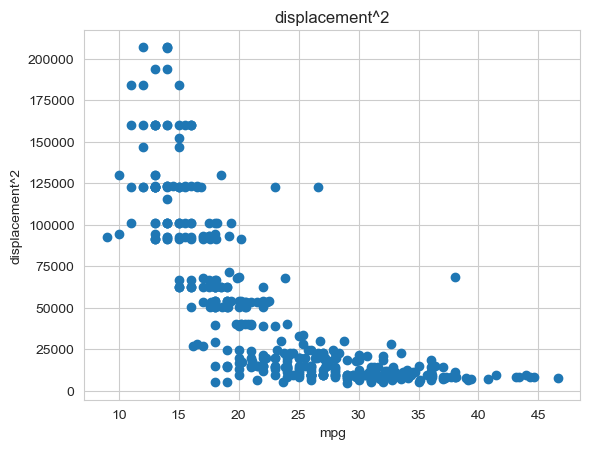

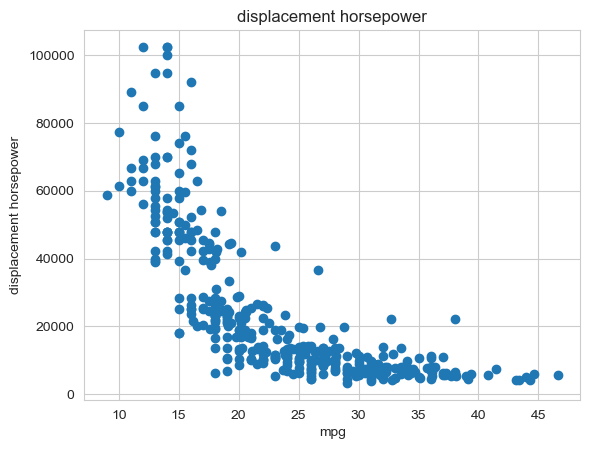

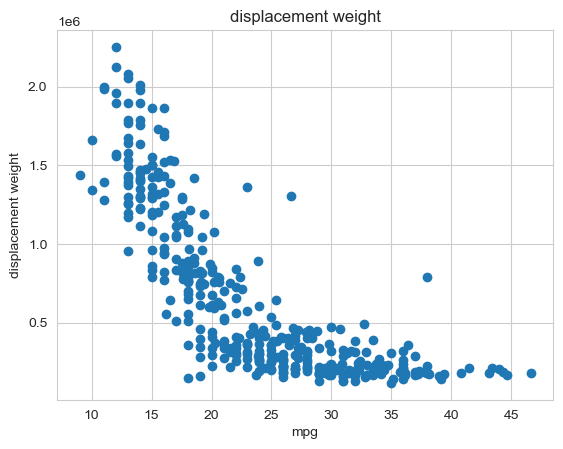

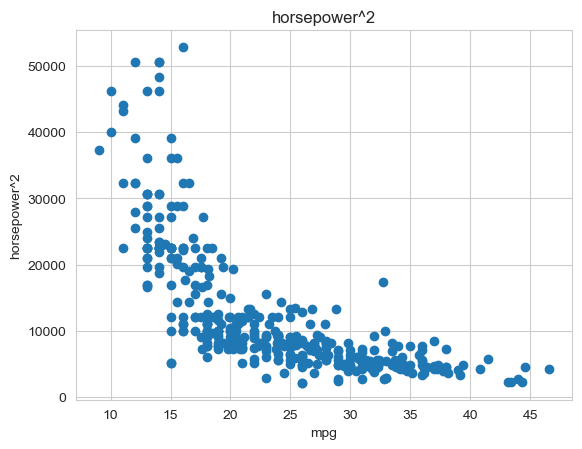

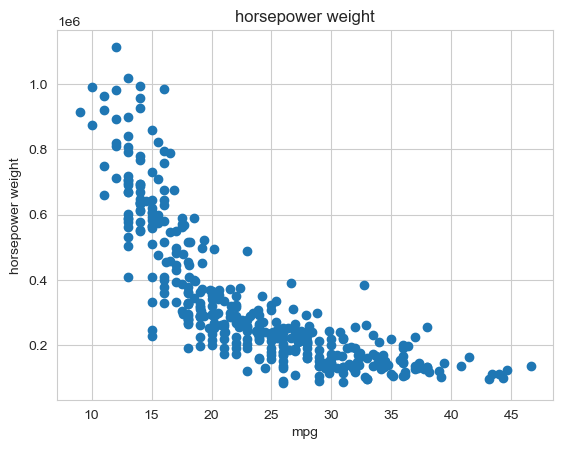

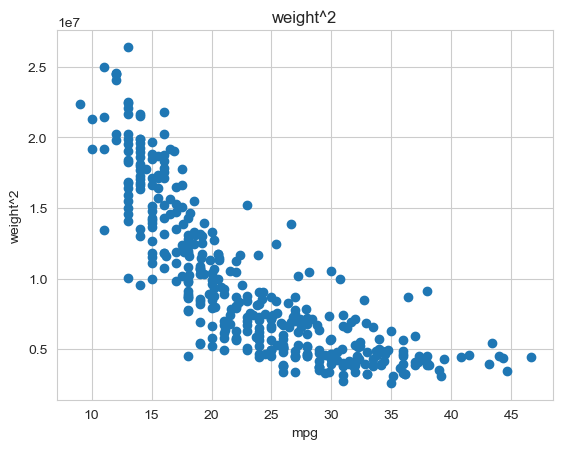

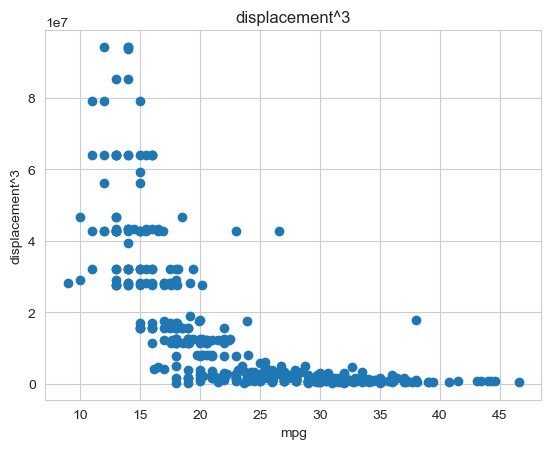

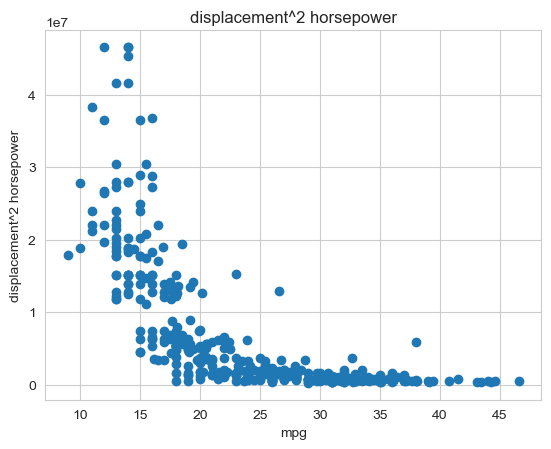

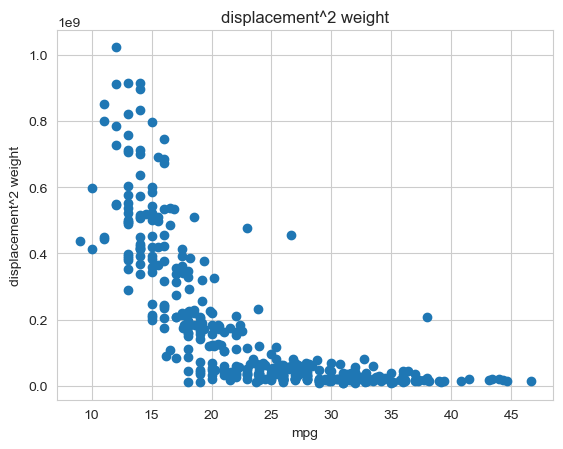

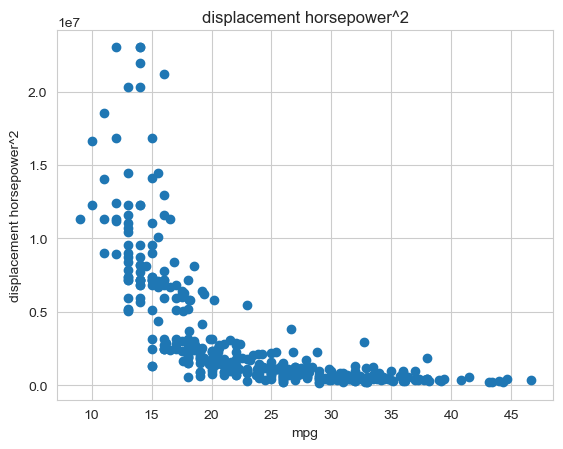

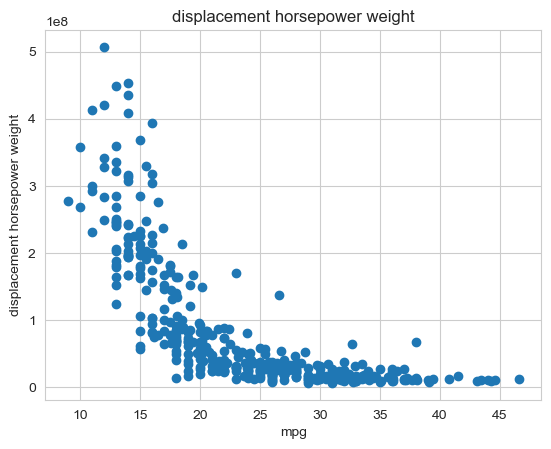

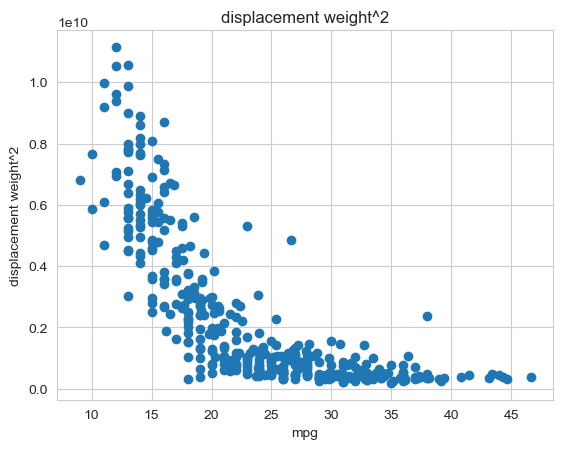

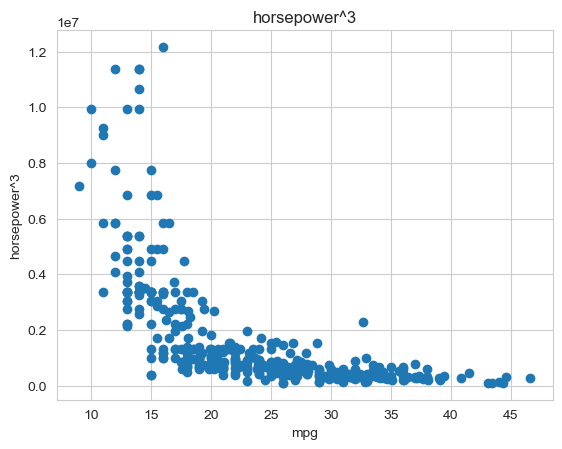

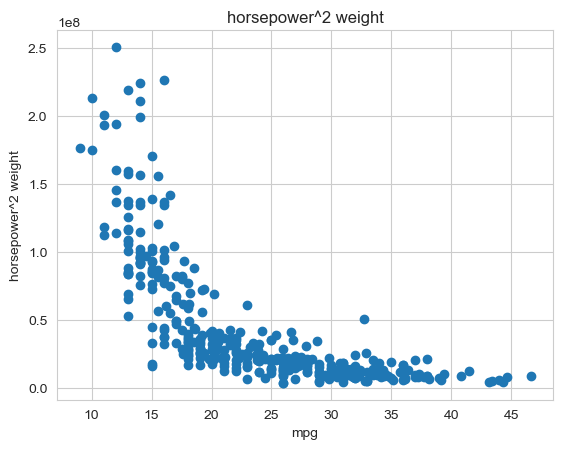

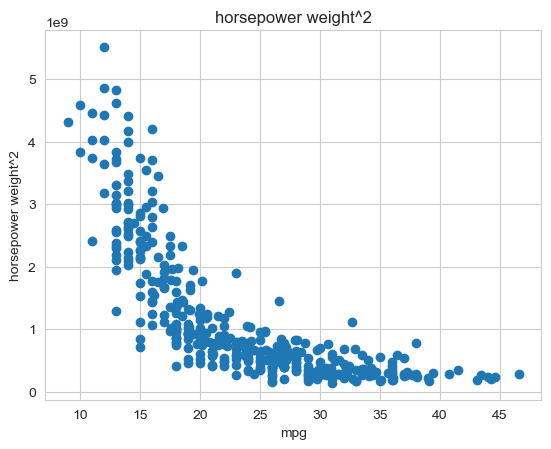

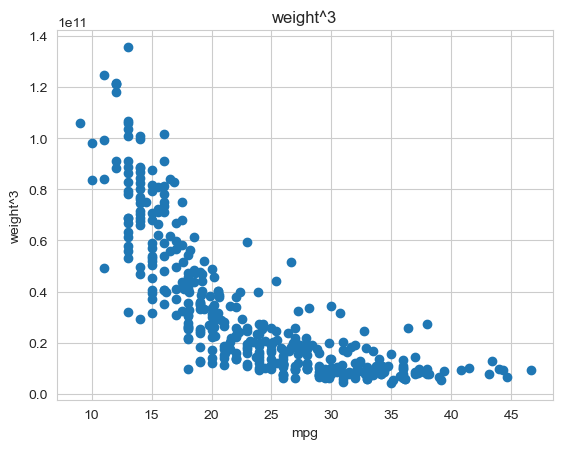

In [350]:
# 혹시 해서 산점도를 그려보았다.
# 그래프의 기울기가 커지고 있다! 차수가 올라갈 수록 그래프의 기울기가 커지며 수평에 가까워진다.
for col in [cols for cols in feature3DF.columns[4:] if 'mpg' not in cols]:
    plt.scatter(feature3DF['mpg'], feature3DF[col])
    plt.title(col)
    plt.xlabel('mpg')
    plt.ylabel(col)
    plt.show()

In [351]:
# 첫번째 방법 : 차수를 엄청나게 키워보자!
poly10D = PolynomialFeatures(include_bias=False, degree=10)
poly10D.fit(HighRDF)
feature10DF = pd.DataFrame(poly10D.transform(HighRDF))
feature10DF.columns = poly10D.get_feature_names_out()

In [352]:
len(feature10DF.columns[34:]), list(feature10DF.columns[34:])

(966,
 ['mpg^4',
  'mpg^3 displacement',
  'mpg^3 horsepower',
  'mpg^3 weight',
  'mpg^2 displacement^2',
  'mpg^2 displacement horsepower',
  'mpg^2 displacement weight',
  'mpg^2 horsepower^2',
  'mpg^2 horsepower weight',
  'mpg^2 weight^2',
  'mpg displacement^3',
  'mpg displacement^2 horsepower',
  'mpg displacement^2 weight',
  'mpg displacement horsepower^2',
  'mpg displacement horsepower weight',
  'mpg displacement weight^2',
  'mpg horsepower^3',
  'mpg horsepower^2 weight',
  'mpg horsepower weight^2',
  'mpg weight^3',
  'displacement^4',
  'displacement^3 horsepower',
  'displacement^3 weight',
  'displacement^2 horsepower^2',
  'displacement^2 horsepower weight',
  'displacement^2 weight^2',
  'displacement horsepower^3',
  'displacement horsepower^2 weight',
  'displacement horsepower weight^2',
  'displacement weight^3',
  'horsepower^4',
  'horsepower^3 weight',
  'horsepower^2 weight^2',
  'horsepower weight^3',
  'weight^4',
  'mpg^5',
  'mpg^4 displacement',
  'm

In [353]:
# 그래프 그릴때마다 커널이 터질려고 한다
# 어... 총 feature수가 966개다
# for col in [cols for cols in feature10DF.columns[34:] if 'mpg' not in cols]:
#     plt.scatter(feature10DF['mpg'], feature10DF[col])
#     plt.title(col)
#     plt.xlabel('mpg')
#     plt.ylabel(col)
#     plt.show()

이건 아닌거 같다... 기울기가 0으로 수렴하고 있다!!
수학적 사고에 의한 오류인듯하다. 그렇다면 반대로 차수를 내리면?
근데 degree를 소수로 줄수 있나..?

In [354]:
# 그딴건 안된다.
# polyrootDF = PolynomialFeatures(include_bias=False, degree=0.5)
# polyrootDF.fit(HighRDF)
# featurerootDF = pd.DataFrame(polyrootDF.transform(HighRDF))
# featurerootDF.columns = polyrootDF.get_feature_names_out()

갑자기 든 기발한 생각 : 음의 상관관계를 양의 상관관계로 바꿔보자!

In [355]:
# 특성들의 부호를 바꾼다
# 경고 따윈 무시한다!
reverse_displacement = -(HighRDF['displacement'])
reverse_horsepower = -(HighRDF['horsepower'])
reverse_weight = -(HighRDF['weight'])
reverseDF = HighRDF[['mpg']]

reverseDF['rdisplacement'] = reverse_displacement
reverseDF['rhorsepower'] = reverse_horsepower
reverseDF['rweight'] = reverse_weight
reverseDF

C:\Users\kdp\AppData\Local\Temp\ipykernel_20836\1839013377.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reverseDF['rdisplacement'] = reverse_displacement
C:\Users\kdp\AppData\Local\Temp\ipykernel_20836\1839013377.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reverseDF['rhorsepower'] = reverse_horsepower


,mpg,rdisplacement,rhorsepower,rweight
0,18.0,-307.0,-130.0,-3504.0
1,15.0,-350.0,-165.0,-3693.0
2,18.0,-318.0,-150.0,-3436.0
3,16.0,-304.0,-150.0,-3433.0
4,17.0,-302.0,-140.0,-3449.0
...,...,...,...,...
393,27.0,-140.0,-86.0,-2790.0
394,44.0,-97.0,-52.0,-2130.0
395,32.0,-135.0,-84.0,-2295.0
396,28.0,-120.0,-79.0,-2625.0


In [356]:
# 상관계수의 부호가 바뀌였다.
reverseDF.corr()

,mpg,rdisplacement,rhorsepower,rweight
mpg,1.000000,0.805127,0.778427,0.832244
rdisplacement,0.805127,1.000000,0.897257,0.932994
rhorsepower,0.778427,0.897257,1.000000,0.864538
rweight,0.832244,0.932994,0.864538,1.000000


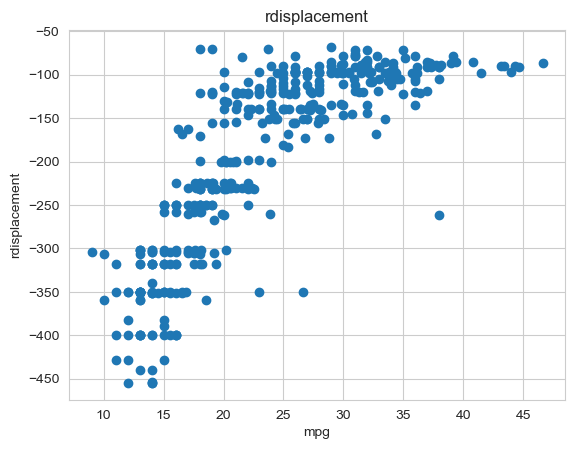

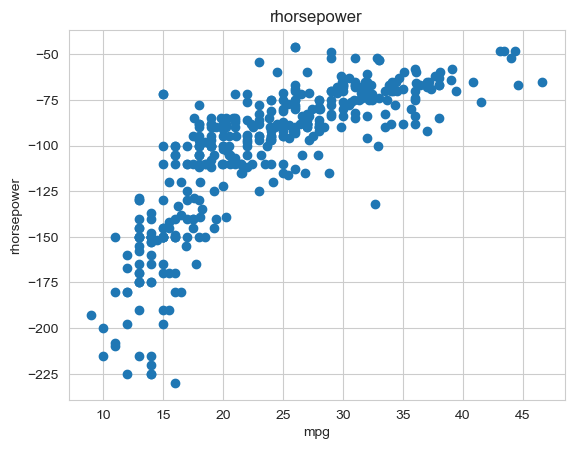

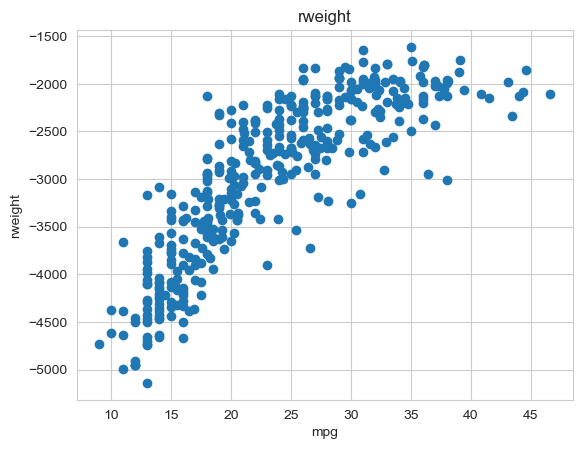

In [357]:
# 이차함수 형태의 그래프를 로그함수 형태로 바꾸는데 성공했다!
# 넌 이제 뒤졌다.
for col in [cols for cols in reverseDF.columns[1:]]:
    plt.scatter(reverseDF['mpg'], reverseDF[col])
    plt.title(col)
    plt.xlabel('mpg')
    plt.ylabel(col)
    plt.show()

In [358]:
# 다시한번 다항회귀를 해보자
poly3D2 = PolynomialFeatures(include_bias=False, degree=3)
poly3D2.fit(reverseDF)
feature3DF2 = pd.DataFrame(poly3D2.transform(reverseDF))
feature3DF2.columns = poly3D2.get_feature_names_out()

In [359]:
# 어... 여전히 상관계수는 다르지 않다.
feature3DF2.corr()

,mpg,rdisplacement,rhorsepower,rweight,mpg^2,mpg rdisplacement,mpg rhorsepower,mpg rweight,rdisplacement^2,rdisplacement rhorsepower,...,rdisplacement^3,rdisplacement^2 rhorsepower,rdisplacement^2 rweight,rdisplacement rhorsepower^2,rdisplacement rhorsepower rweight,rdisplacement rweight^2,rhorsepower^3,rhorsepower^2 rweight,rhorsepower rweight^2,rweight^3
mpg,1.000000,0.805127,0.778427,0.832244,0.985195,0.369665,-0.288968,-0.593988,-0.752354,-0.748342,...,0.685794,0.680652,0.729494,0.664633,0.726758,0.759713,0.634612,0.706134,0.756658,0.771288
rdisplacement,0.805127,1.000000,0.897257,0.932994,0.731850,0.787959,0.082501,-0.192701,-0.981875,-0.955263,...,0.936803,0.917971,0.957183,0.879811,0.935021,0.952003,0.813244,0.878001,0.915266,0.909341
rhorsepower,0.778427,0.897257,1.000000,0.864538,0.709523,0.601108,0.289238,-0.269182,-0.910831,-0.961672,...,0.898207,0.926690,0.906932,0.941832,0.944906,0.896895,0.938978,0.963175,0.941594,0.862137
rweight,0.832244,0.932994,0.864538,1.000000,0.764271,0.672780,0.014798,-0.119816,-0.895605,-0.880002,...,0.836850,0.823442,0.899644,0.794915,0.887812,0.945377,0.744750,0.848489,0.929745,0.970264
mpg^2,0.985195,0.731850,0.709523,0.764271,1.000000,0.317663,-0.308940,-0.609178,-0.671483,-0.666591,...,0.603053,0.596855,0.644036,0.581418,0.640085,0.674061,0.554511,0.621191,0.670570,0.688905
mpg rdisplacement,0.369665,0.787959,0.601108,0.672780,0.317663,1.000000,0.400107,0.339369,-0.751798,-0.692074,...,0.702442,0.663758,0.701192,0.609056,0.653016,0.676422,0.527655,0.571465,0.603822,0.614445
mpg rhorsepower,-0.288968,0.082501,0.289238,0.014798,-0.308940,0.400107,1.000000,0.546296,-0.132601,-0.205763,...,0.181141,0.219903,0.132669,0.259726,0.182289,0.080760,0.301454,0.237327,0.144222,0.025466
mpg rweight,-0.593988,-0.192701,-0.269182,-0.119816,-0.609178,0.339369,0.546296,1.000000,0.199609,0.228016,...,-0.193450,-0.212092,-0.186551,-0.228952,-0.208677,-0.171766,-0.246272,-0.232021,-0.198430,-0.142022
rdisplacement^2,-0.752354,-0.981875,-0.910831,-0.895605,-0.671483,-0.751798,-0.132601,0.199609,1.000000,0.982258,...,-0.985518,-0.970779,-0.989025,-0.935722,-0.971969,-0.965984,-0.871475,-0.920008,-0.936186,-0.905572
rdisplacement rhorsepower,-0.748342,-0.955263,-0.961672,-0.880002,-0.666591,-0.692074,-0.205763,0.228016,0.982258,1.000000,...,-0.977946,-0.987846,-0.977521,-0.978844,-0.989854,-0.953395,-0.942837,-0.971382,-0.959951,-0.896303


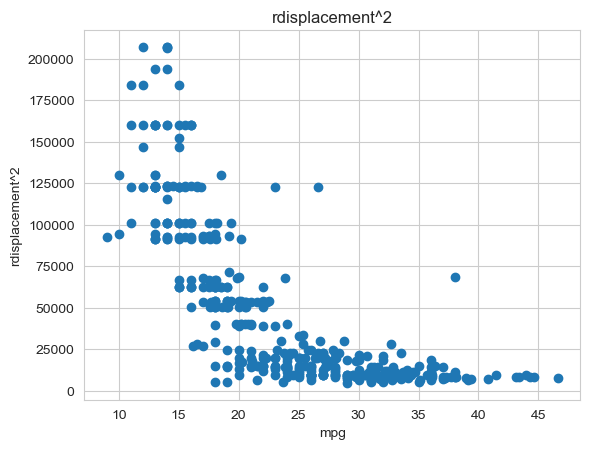

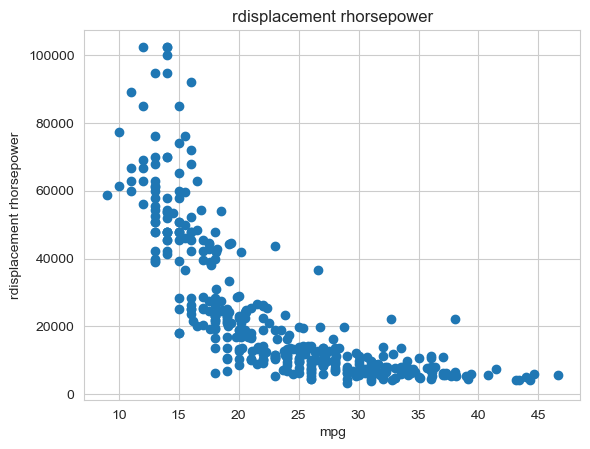

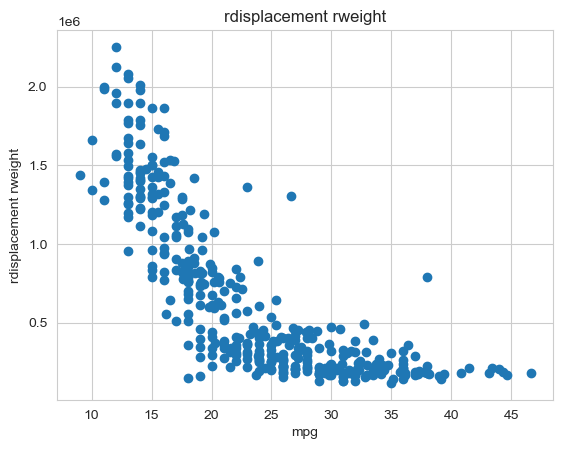

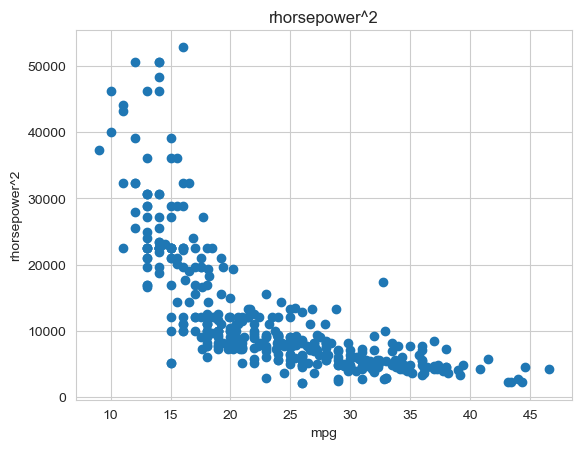

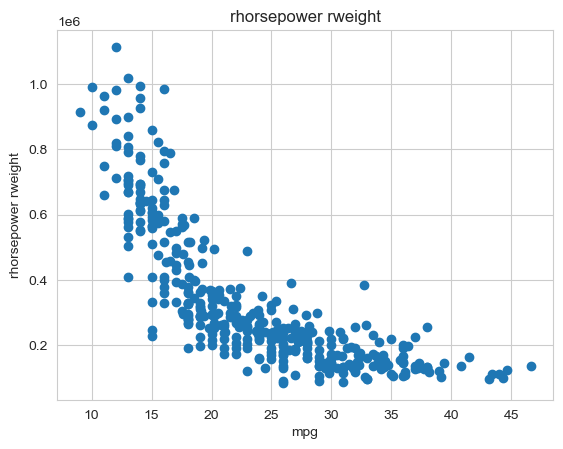

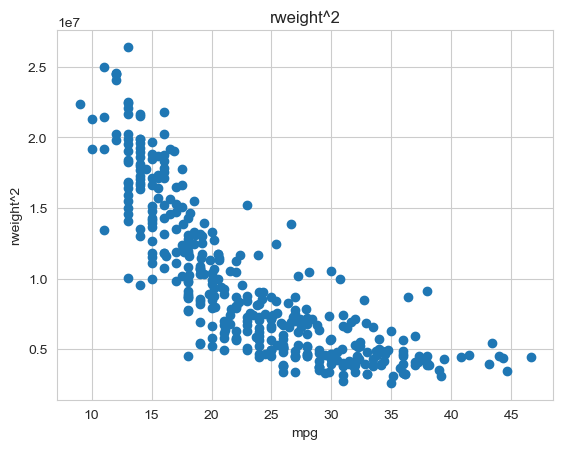

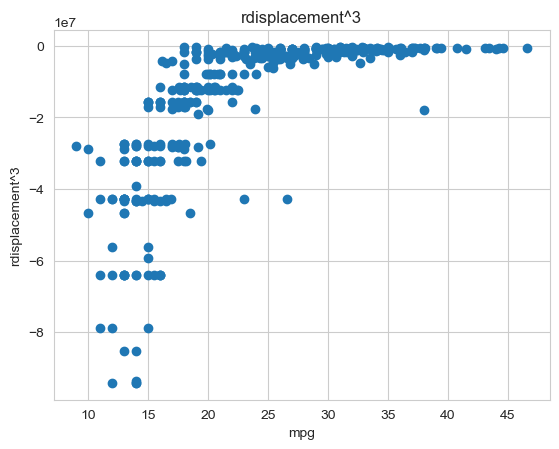

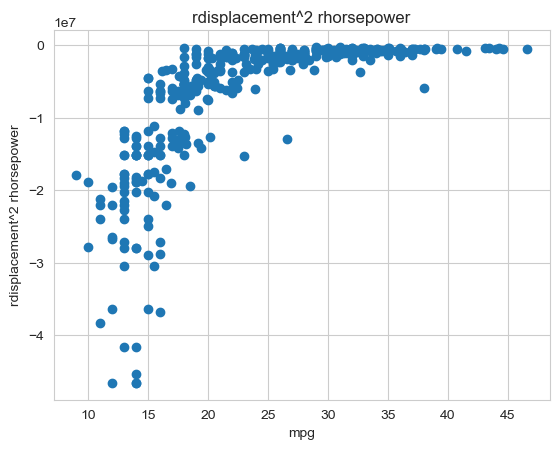

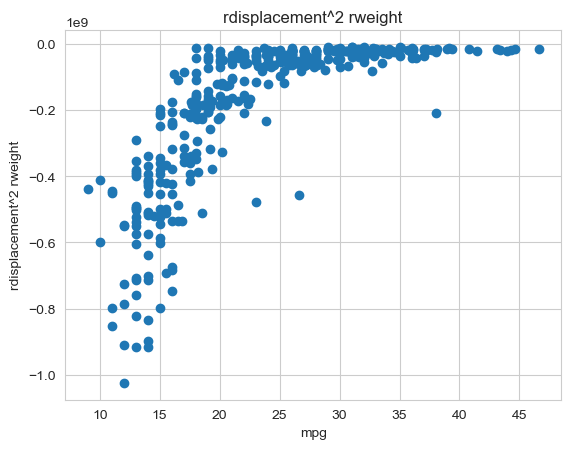

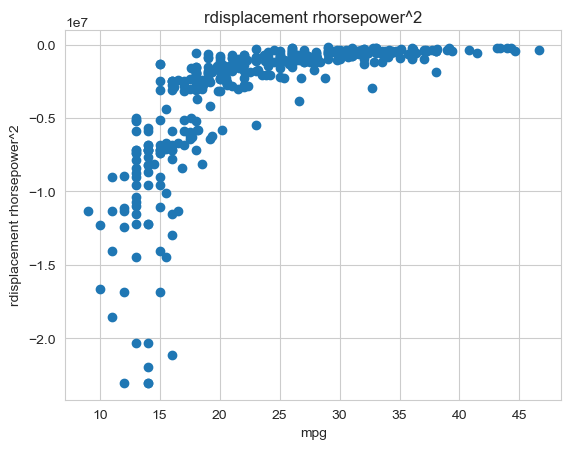

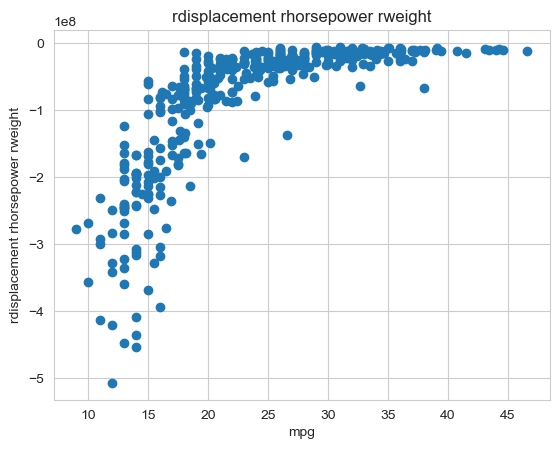

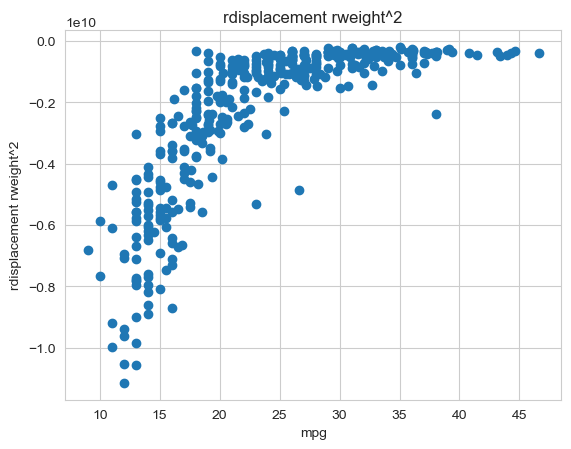

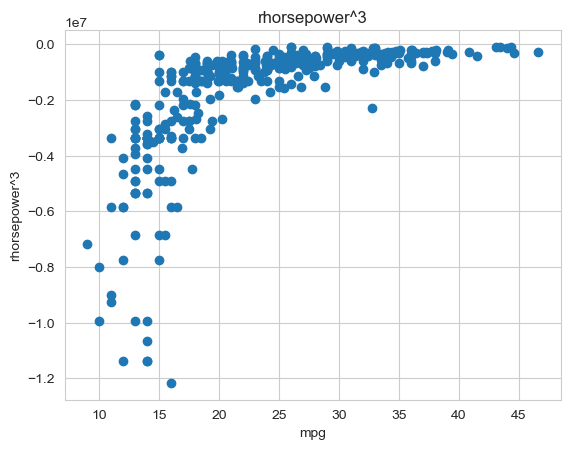

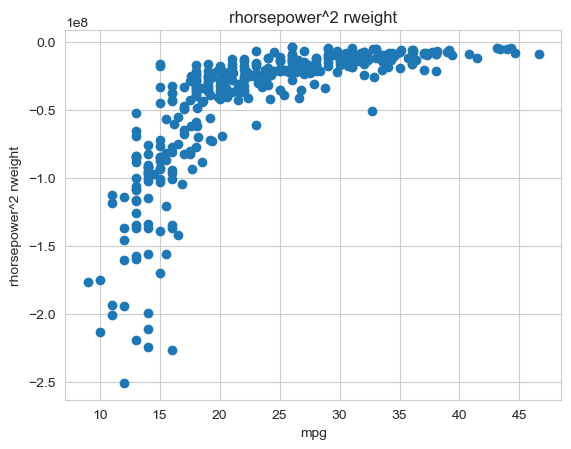

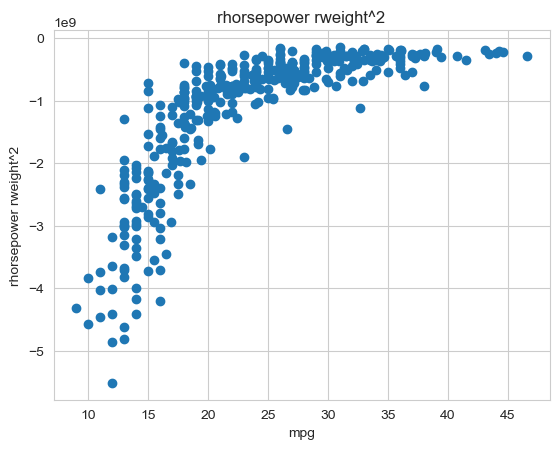

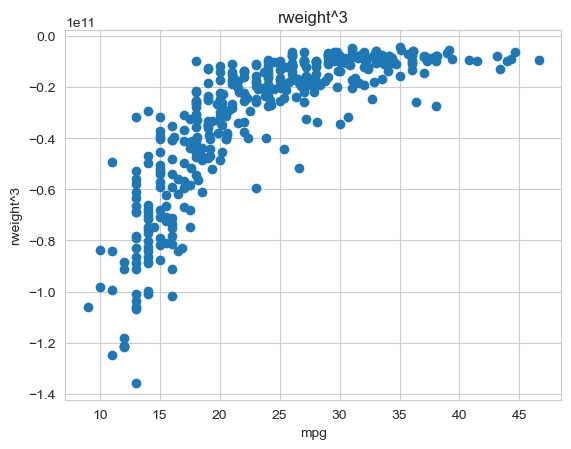

In [360]:
# 아니 그냥 하니까 원래대로 돌아가잖아
for col in [cols for cols in feature3DF2.columns[4:] if 'mpg' not in cols]:
    plt.scatter(feature3DF2['mpg'], feature3DF2[col])
    plt.title(col)
    plt.xlabel('mpg')
    plt.ylabel(col)
    plt.show()

In [361]:
# 통계량을 다시 한번 보며 방법을 생각해봤다
# 자료형을 좀더 손보면 어떻게 될거 같은데
reverseDF.describe()

,mpg,rdisplacement,rhorsepower,rweight
count,392.000000,392.000000,392.000000,392.000000
mean,23.445918,-194.411990,-104.469388,-2977.584184
std,7.805007,104.644004,38.491160,849.402560
min,9.000000,-455.000000,-230.000000,-5140.000000
25%,17.000000,-275.750000,-126.000000,-3614.750000
50%,22.750000,-151.000000,-93.500000,-2803.500000
75%,29.000000,-105.000000,-75.000000,-2225.250000
max,46.600000,-68.000000,-46.000000,-1613.000000


In [362]:
# 단순하게 최대값과 최저값의 합의 절대값을 더해보자!
normalize_displacement = (reverseDF['rdisplacement'] + abs(reverseDF['rdisplacement'].min()+reverseDF['rdisplacement'].max())).copy()
normalize_horsepower = (reverseDF['rhorsepower'] + abs(reverseDF['rhorsepower'].min()+reverseDF['rhorsepower'].max())).copy()
normalize_weight = (reverseDF['rweight'] + abs(reverseDF['rweight'].min()+reverseDF['rweight'].max())).copy()

normalizeDF = pd.concat([reverseDF['mpg'], normalize_displacement, normalize_horsepower, normalize_weight], axis=1)
normalizeDF

,mpg,rdisplacement,rhorsepower,rweight
0,18.0,216.0,146.0,3249.0
1,15.0,173.0,111.0,3060.0
2,18.0,205.0,126.0,3317.0
3,16.0,219.0,126.0,3320.0
4,17.0,221.0,136.0,3304.0
...,...,...,...,...
393,27.0,383.0,190.0,3963.0
394,44.0,426.0,224.0,4623.0
395,32.0,388.0,192.0,4458.0
396,28.0,403.0,197.0,4128.0


In [363]:
normalizeDF.corr()

,mpg,rdisplacement,rhorsepower,rweight
mpg,1.000000,0.805127,0.778427,0.832244
rdisplacement,0.805127,1.000000,0.897257,0.932994
rhorsepower,0.778427,0.897257,1.000000,0.864538
rweight,0.832244,0.932994,0.864538,1.000000


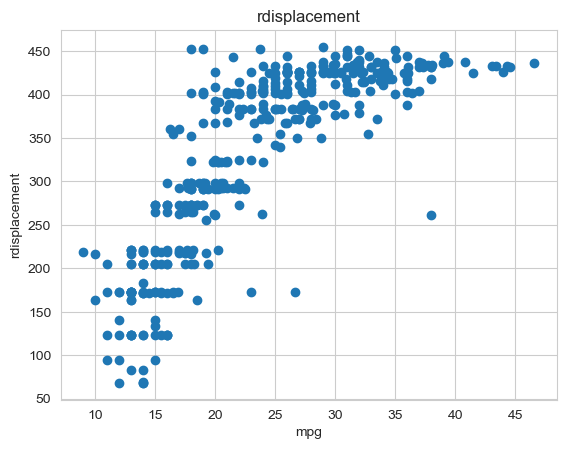

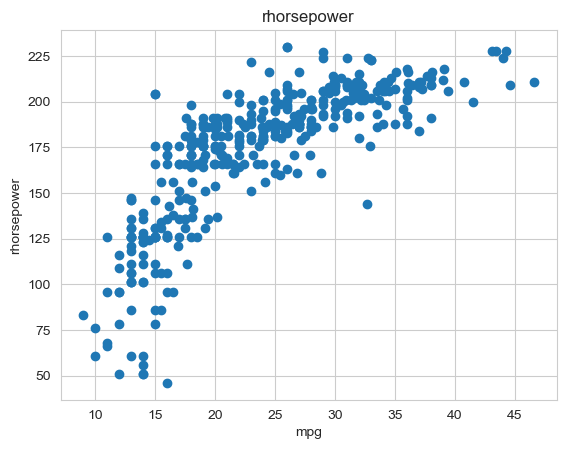

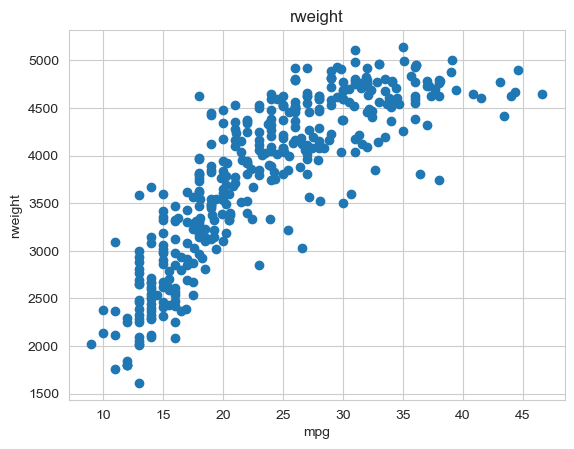

In [364]:
# 상관계수와 그래프 모양이 유지됨을 확인
for col in [cols for cols in normalizeDF.columns[1:]]:
    plt.scatter(normalizeDF['mpg'], normalizeDF[col])
    plt.title(col)
    plt.xlabel('mpg')
    plt.ylabel(col)
    plt.show()

In [365]:
polyN3D = PolynomialFeatures(include_bias=False, degree=3)
polyN3D.fit(normalizeDF)
featureN3DF = pd.DataFrame(polyN3D.transform(normalizeDF))
featureN3DF.columns = polyN3D.get_feature_names_out()

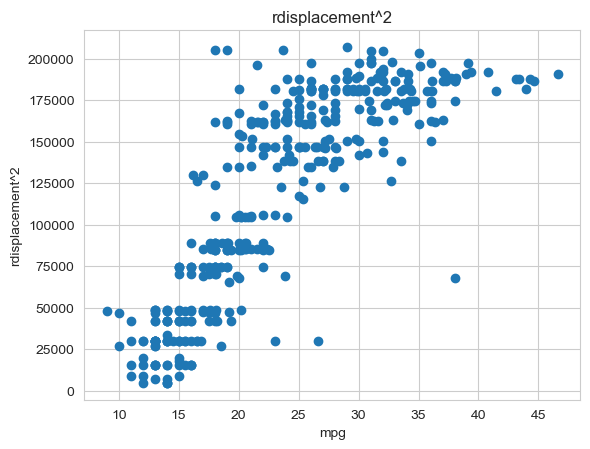

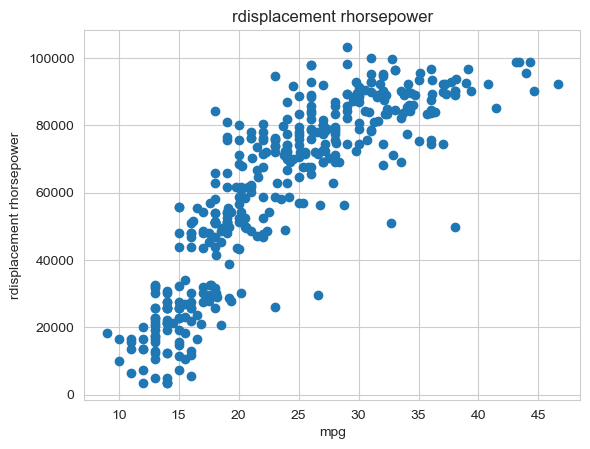

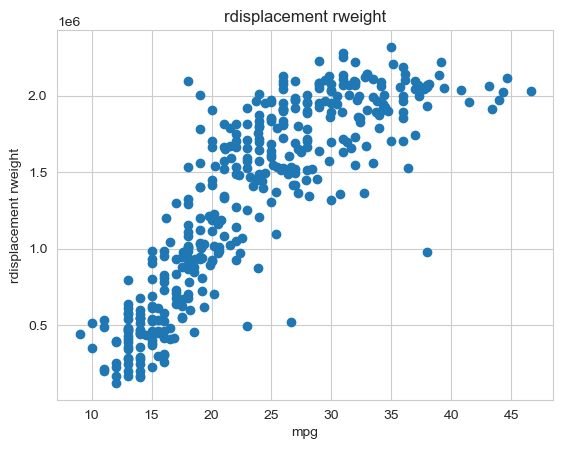

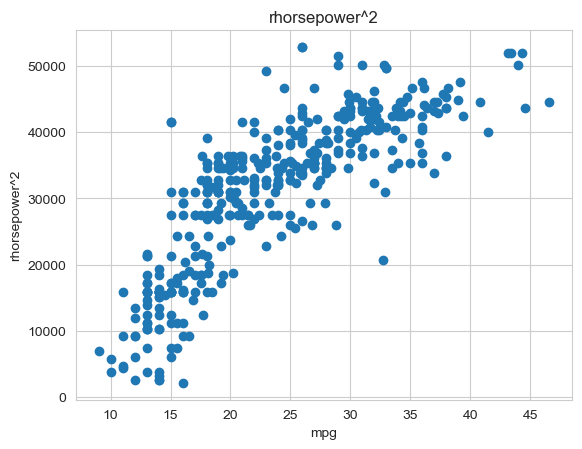

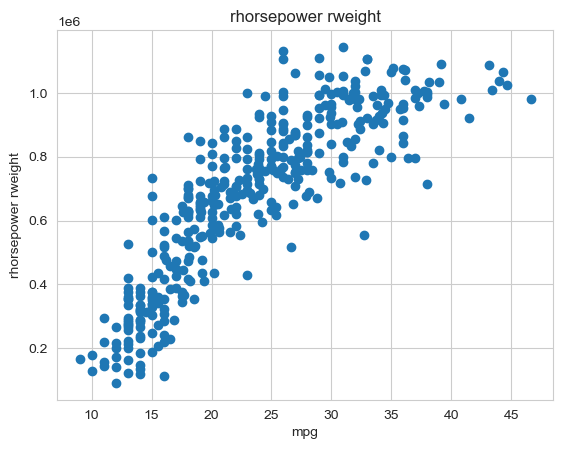

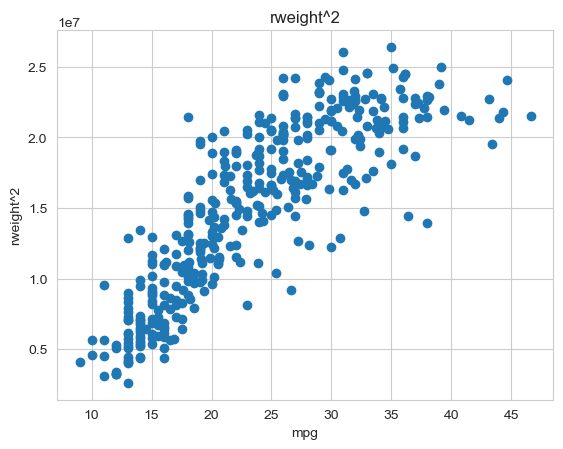

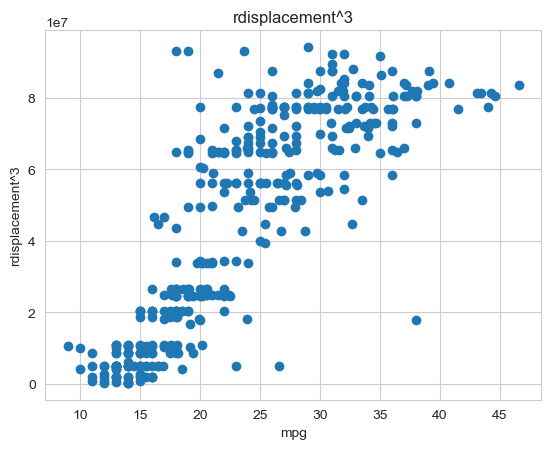

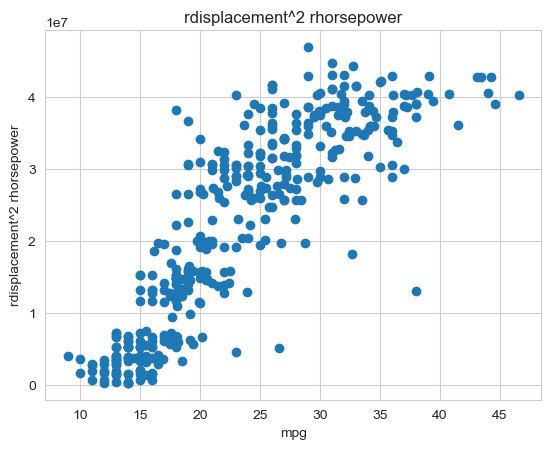

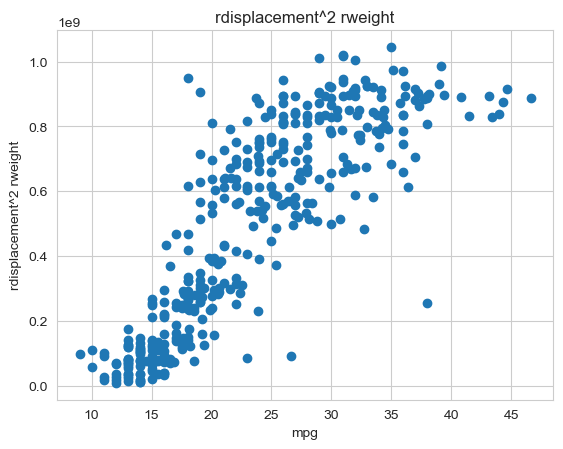

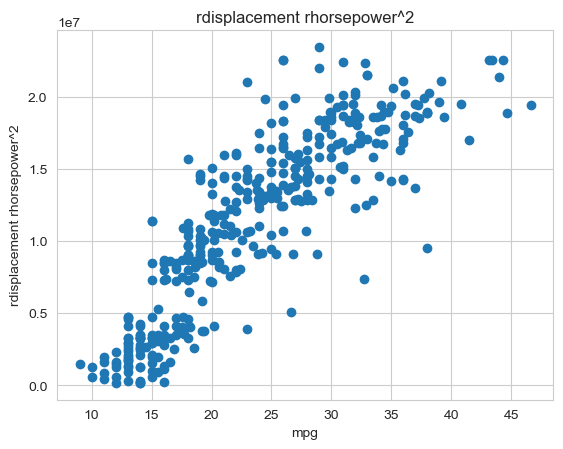

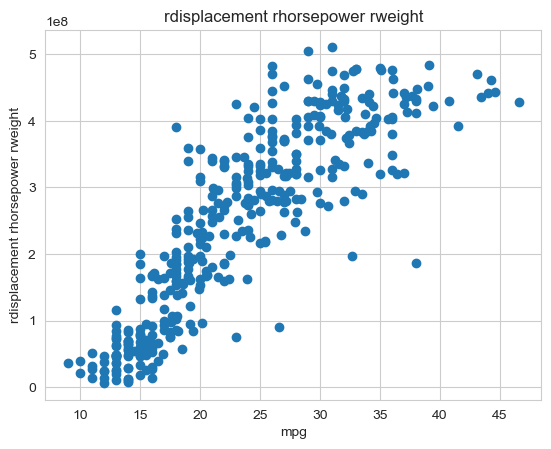

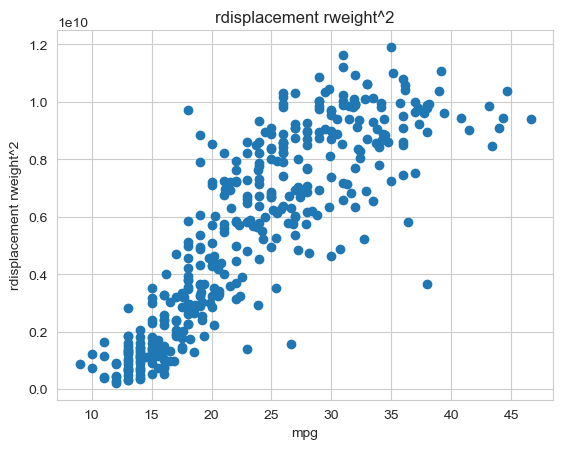

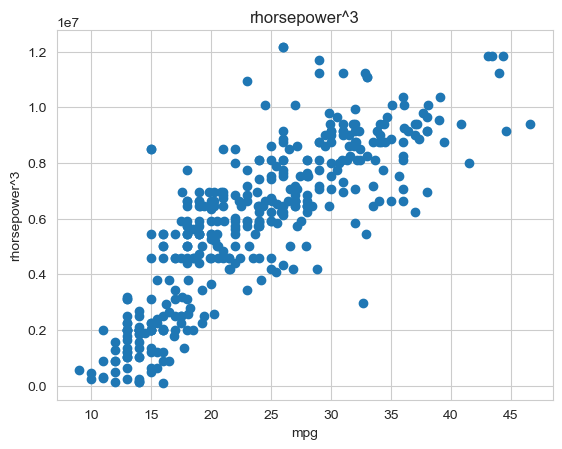

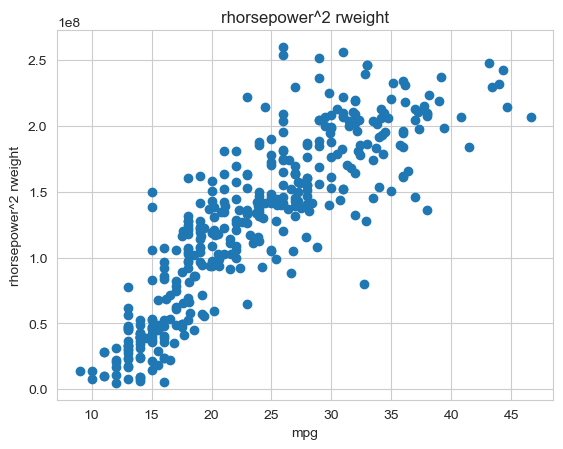

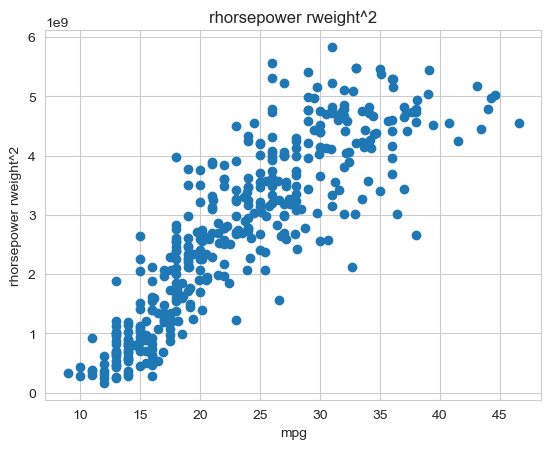

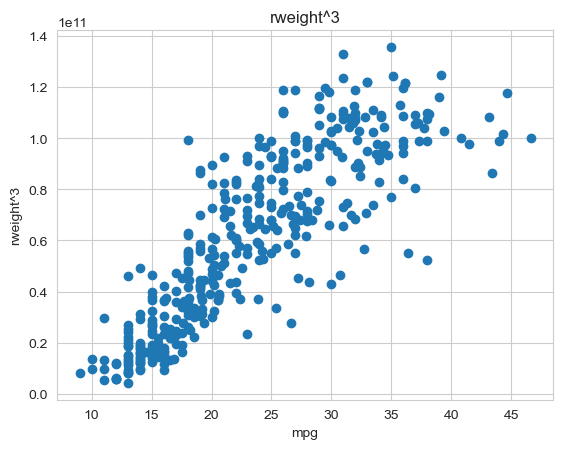

In [366]:
# 그래프가 직선형태가 가까워지고 있다! 생각한대로 되고 있다!
for col in [cols for cols in featureN3DF.columns[4:] if 'mpg' not in cols]:
    plt.scatter(featureN3DF['mpg'], featureN3DF[col])
    plt.title(col)
    plt.xlabel('mpg')
    plt.ylabel(col)
    plt.show()

In [367]:
# 상관계수도 확실히 올라갔다!
# 넌 진짜 뒤졌다
featureN3DF.corr()

,mpg,rdisplacement,rhorsepower,rweight,mpg^2,mpg rdisplacement,mpg rhorsepower,mpg rweight,rdisplacement^2,rdisplacement rhorsepower,...,rdisplacement^3,rdisplacement^2 rhorsepower,rdisplacement^2 rweight,rdisplacement rhorsepower^2,rdisplacement rhorsepower rweight,rdisplacement rweight^2,rhorsepower^3,rhorsepower^2 rweight,rhorsepower rweight^2,rweight^3
mpg,1.000000,0.805127,0.778427,0.832244,0.985195,0.972679,0.981555,0.981862,0.826304,0.847693,...,0.830364,0.855910,0.845564,0.860625,0.865568,0.852020,0.827131,0.859755,0.863167,0.845016
rdisplacement,0.805127,1.000000,0.897257,0.932994,0.731850,0.905641,0.853213,0.857818,0.988552,0.979681,...,0.966106,0.968080,0.962171,0.946131,0.955752,0.945508,0.879102,0.917003,0.923632,0.904760
rhorsepower,0.778427,0.897257,1.000000,0.864538,0.709523,0.835451,0.866749,0.809839,0.863232,0.940917,...,0.828596,0.885497,0.842162,0.934790,0.897071,0.845078,0.961994,0.940724,0.893237,0.824936
rweight,0.832244,0.932994,0.864538,1.000000,0.764271,0.900735,0.867875,0.905416,0.938616,0.943746,...,0.929233,0.941234,0.953137,0.930855,0.961856,0.969962,0.878413,0.942359,0.972279,0.977364
mpg^2,0.985195,0.731850,0.709523,0.764271,1.000000,0.946652,0.962181,0.961673,0.760969,0.783047,...,0.773126,0.799812,0.789357,0.806701,0.810859,0.797569,0.777462,0.807998,0.810993,0.793885
mpg rdisplacement,0.972679,0.905641,0.835451,0.900735,0.946652,1.000000,0.980031,0.987950,0.926382,0.931487,...,0.929296,0.944177,0.937827,0.934271,0.945164,0.935515,0.879275,0.920764,0.930341,0.915471
mpg rhorsepower,0.981555,0.853213,0.866749,0.867875,0.962181,0.980031,1.000000,0.981385,0.866830,0.908898,...,0.866233,0.905757,0.882647,0.927186,0.917349,0.889442,0.912909,0.929114,0.915537,0.879908
mpg rweight,0.981862,0.857818,0.809839,0.905416,0.961673,0.987950,0.981385,1.000000,0.884046,0.897818,...,0.891949,0.912739,0.913328,0.910350,0.928962,0.926111,0.865778,0.915808,0.933228,0.926417
rdisplacement^2,0.826304,0.988552,0.863232,0.938616,0.760969,0.926382,0.866830,0.884046,1.000000,0.979166,...,0.993696,0.988422,0.988632,0.956306,0.974404,0.971268,0.875670,0.924838,0.941617,0.932746
rdisplacement rhorsepower,0.847693,0.979681,0.940917,0.943746,0.783047,0.931487,0.908898,0.897818,0.979166,1.000000,...,0.965105,0.988416,0.968950,0.990888,0.985466,0.960880,0.952244,0.974070,0.964685,0.931314


In [368]:
# 3개의 특성이 융합된 특성만 사용
X_train, X_test, y_train, y_test = train_test_split(featureN3DF[['rdisplacement rhorsepower rweight']],
                                                    featureN3DF['mpg'],
                                                    random_state=7)

In [369]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)
std_X_train = std_scaler.transform(X_train)
std_X_test = std_scaler.transform(X_test)

In [370]:
Linear_3Dmodel = LinearRegression()
Linear_3Dmodel.fit(std_X_train, y_train)

LinearRegression()

In [371]:
# 어... 조금이지만 좋아졌다
Linear_3Dmodel.score(std_X_train, y_train), Linear_3Dmodel.score(std_X_test, y_test)

(0.7386842962512408, 0.7789380721151183)

In [372]:
featureN3DF.columns

Index(['mpg', 'rdisplacement', 'rhorsepower', 'rweight', 'mpg^2',
       'mpg rdisplacement', 'mpg rhorsepower', 'mpg rweight',
       'rdisplacement^2', 'rdisplacement rhorsepower', 'rdisplacement rweight',
       'rhorsepower^2', 'rhorsepower rweight', 'rweight^2', 'mpg^3',
       'mpg^2 rdisplacement', 'mpg^2 rhorsepower', 'mpg^2 rweight',
       'mpg rdisplacement^2', 'mpg rdisplacement rhorsepower',
       'mpg rdisplacement rweight', 'mpg rhorsepower^2',
       'mpg rhorsepower rweight', 'mpg rweight^2', 'rdisplacement^3',
       'rdisplacement^2 rhorsepower', 'rdisplacement^2 rweight',
       'rdisplacement rhorsepower^2', 'rdisplacement rhorsepower rweight',
       'rdisplacement rweight^2', 'rhorsepower^3', 'rhorsepower^2 rweight',
       'rhorsepower rweight^2', 'rweight^3'],
      dtype='object')

In [373]:
# 컬럼을 좀더 추가해보자
X_train, X_test, y_train, y_test = train_test_split(featureN3DF[['rdisplacement^3',
                                                                 'rhorsepower^3',
                                                                 'rweight^3',
                                                                 'rdisplacement rhorsepower rweight']],
                                                    featureN3DF['mpg'],
                                                    random_state=7)

In [374]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)
std_X_train = std_scaler.transform(X_train)
std_X_test = std_scaler.transform(X_test)

In [375]:
# 특성을 추가해보니 좋아지긴 한다. 그렇다면...?
Linear_3Dmodel = LinearRegression()
Linear_3Dmodel.fit(std_X_train, y_train)
Linear_3Dmodel.score(std_X_train, y_train), Linear_3Dmodel.score(std_X_test, y_test)

(0.7412282940304449, 0.7847243142171214)

In [376]:
# 3차원 데이터를 다 때려박아보자
X_train, X_test, y_train, y_test = train_test_split(featureN3DF[['rdisplacement^3',
       'rdisplacement^2 rhorsepower', 'rdisplacement^2 rweight',
       'rdisplacement rhorsepower^2', 'rdisplacement rhorsepower rweight',
       'rdisplacement rweight^2', 'rhorsepower^3', 'rhorsepower^2 rweight',
       'rhorsepower rweight^2', 'rweight^3']],
                                                    featureN3DF['mpg'],
                                                    random_state=7)

In [377]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)
std_X_train = std_scaler.transform(X_train)
std_X_test = std_scaler.transform(X_test)

In [378]:
# 이건 좀 뇌절인듯
Linear_3Dmodel = LinearRegression()
Linear_3Dmodel.fit(std_X_train, y_train)
Linear_3Dmodel.score(std_X_train, y_train), Linear_3Dmodel.score(std_X_test, y_test)

(0.7790851298440219, 0.7399306629978192)

In [379]:
# 스케일러를 로버스트 스케일러로 바꿔보자
X_train, X_test, y_train, y_test = train_test_split(featureN3DF[['rdisplacement^3',
                                                                 'rhorsepower^3',
                                                                 'rweight^3',
                                                                 'rdisplacement rhorsepower rweight']],
                                                    featureN3DF['mpg'],
                                                    random_state=7)

rb_scaler = RobustScaler()
rb_scaler.fit(X_train)
rb_X_train = rb_scaler.transform(X_train)
rb_X_test = rb_scaler.transform(X_test)

Linear_3Dmodel = LinearRegression()
Linear_3Dmodel.fit(rb_X_train, y_train)

# std와 딱히 다르진 않다.
Linear_3Dmodel.score(rb_X_train, y_train), Linear_3Dmodel.score(rb_X_test, y_test)

(0.7412282940304449, 0.7847243142171214)

In [380]:
# KNN회귀도 사용해 보았다.
# k값을 50까지 줘보며 모델 학습
train_list = []
test_list = []
max_k = 0
max_test_score = 0
for k in range(1, 51):
    KNN_3Dmodel = KNeighborsRegressor(n_neighbors=k)
    KNN_3Dmodel.fit(std_X_train, y_train)
    
    train_score = KNN_3Dmodel.score(std_X_train, y_train)
    test_score = KNN_3Dmodel.score(std_X_test, y_test)
    
    train_list.append(train_score)
    test_list.append(test_score)
    
    if test_score > max_test_score:
        max_k = k
        max_test_score = test_score

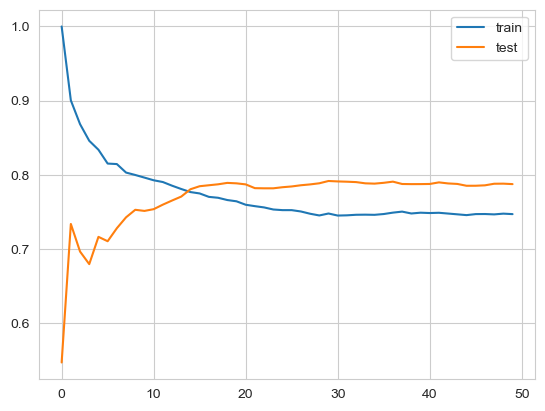


max K = 30
max test score = 0.791758048259841


In [383]:
# KNN 회귀에서 효과가 더 좋아진다.
plt.plot(train_list)
plt.plot(test_list)
plt.legend(['train', 'test'])
plt.show()

print()
print(f'max K = {max_k}\n'
      f'max test score = {max_test_score}')

### 연구 결과
- 데이터 분포는 음의 이차함수의 형태를 띄고 있어 이대로 분석해도 성능이 꽤 나오는 편이지만, 다항회귀를 이용한 성능 향상이 불가능했다.
- 그러나 데이터의 부호를 바꾸어 정규화 비스무리한걸 함으로써 다항회귀를 사용한 분석에 성공하였다.
- 그럼에도 보여지는 성능의 한계는 데이터의 분산 때문으로 보이며 정규화 과정에서 조금 더 고민해봐야 할듯 싶다.
- 이 외에 다른 매개변수들을 건드리거나 다른 특성들도 조합하면 성능의 변화가 있을 것으로 보이나, 거기까지 하기엔 귀찮다.